<h1>Stroke prediction dataset: EDA + ML Classification models </h1>

<h2>Table of contents</h2>

* [Introduction](#Introduction)
    - [Personal motivation](#Personal-motivation)
    - [Objectives](#Objectives)
* [Importing](#Importing)
* [EDA (Exploratory Data Analysis](#EDA)
    - [Overview](#Overview)
    - [Univariate analysis](#univariate)
        + [Categorical variables](#Categorical-uni)
        + [Numerical variables](#Numerical-uni)
    - [Correlations](#Correlations)
    - [Bivariate analysis](#Bivariate)
        + [Categorical variables](#Categorical-bi)
        + [Numerical variables](#Numerical-bi)
* [Modeling](#Models)
    - [SMOTE](#Smote)
    - [Applying the model and cross-validation](#Applying)
    - [Hyperparameter optimization](#Hyperparam-tuning)
    - [Classifying my own data](#Myself)
    - [ROC Curve and confusion matrix](#ROC)
* [Conclusions](#Conclusions)

<h2>1.- Introduction</h2>
<a id="Introduction"></a>

<p>Stroke is the 2nd leading cause of death wordwide, only behind heart attacks, responsible for approximately 11% of total deaths, according to the World Health <br/> Organization Global Estimates. Taking into account that is a preventable condition, much effort has been put into detecting its causes. In this analysis we will try to <br/>understand, with the available data, what kind of relationship exists between a stroke event and other physiological and enviromental factors, such as age, glucose levels and smoking habits. <br/>
</p>
<br/>
<h3>1.1.- Personal motivation</h3>
<a id="Personal-motivation"></a>
<p>Stroke events are really common in my family. None of the cases were lethal, but three out of four of my grandparents and also my father had one, both ischemic</br> (lack of blood flow in the brain due to a blood clot) and hemorrhagic (bleeding in the brain because of damaged blood vessels), with different levels</br> of consecuences after, ranging from none at all to severe motor and language skills impairement. Therefore, i thought it could be intereseting to see what </br>
a machine learning classification algorithm trained with this data has to say about my own condition, using it to classify my own data. </p>




<h3>1.2.- Objectives</h3>
<a id="Objectives"></a>
<ul>
<li>Describe the distribution of the numerical variables such as age and body mass index and how they can affect the probability of stroke.</li>
<li>Analyze the characteristics of categorical variables and its relationship with stroke.</li>
<li>Implement machine learning classification algorithms to predict stroke, select the best performing ones and try to optimize it.</li>
<li>Observe what is the predicted class by the model with my own data (wish me luck).</li>
</ul>

<h2>2.- Importing libraries and loading dataset</h2> 
<a id="Importing"></a>

In [ ]:
pip install plotly

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from pathlib import Path

In [5]:
import plotly 
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots

In [6]:
CUR_DIR = Path('__file__').resolve().parent
PAR_DIR = CUR_DIR.parent


dataframe = pd.read_csv(f'{PAR_DIR}/healthcare-dataset-stroke-data.csv')

<h2>3.- Exploratory Data Analysis</h2>
<a id="EDA"></a>

<h3>3.1.- Overview of the dataset</h3>
<a id="Overview"></a>

In [7]:
dataframe.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
dataframe.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<p><b>Observations</b>: we have some missing values in the BMI column. We will deal with this by replacing those missing values with the mean for that column. </p>

In [10]:
dataframe.bmi.replace(to_replace=np.nan, value=dataframe.bmi.mean(), inplace=True)
dataframe.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
'work_type', 'Residence_type', 'smoking_status']

numerical = ['age','avg_glucose_level', 'bmi']
dataframe[numerical].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.698018
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.800000
50%,45.000000,91.885000,28.400000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


<h2>3.2.- Univariate analysis</h2>
<a id="Univariate"></a>

In [12]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

[Text(0, 0, '4861'), Text(0, 0, '249')]

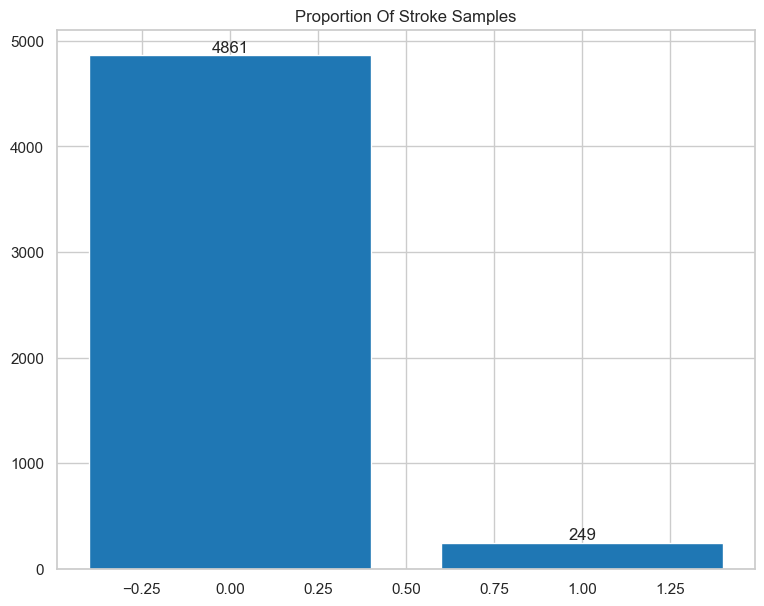

In [13]:
fig, ax = plt.subplots(figsize=(9,7))
bars = ax.bar(dataframe['stroke'].value_counts().index, height = dataframe['stroke'].value_counts().values)
plt.title('Proportion Of Stroke Samples')
ax.bar_label(bars)

<p><b>Observations</b>: the dataset has a significant inbalance with few positive cases in the stroke column. </br> 
Given that this is the variable that we want to mode, we will have to deal with this somehow when applying the ML models.</p>

<h3>3.2.a.- Categorical variables</h3>
<a id="Categorical-uni"></a>

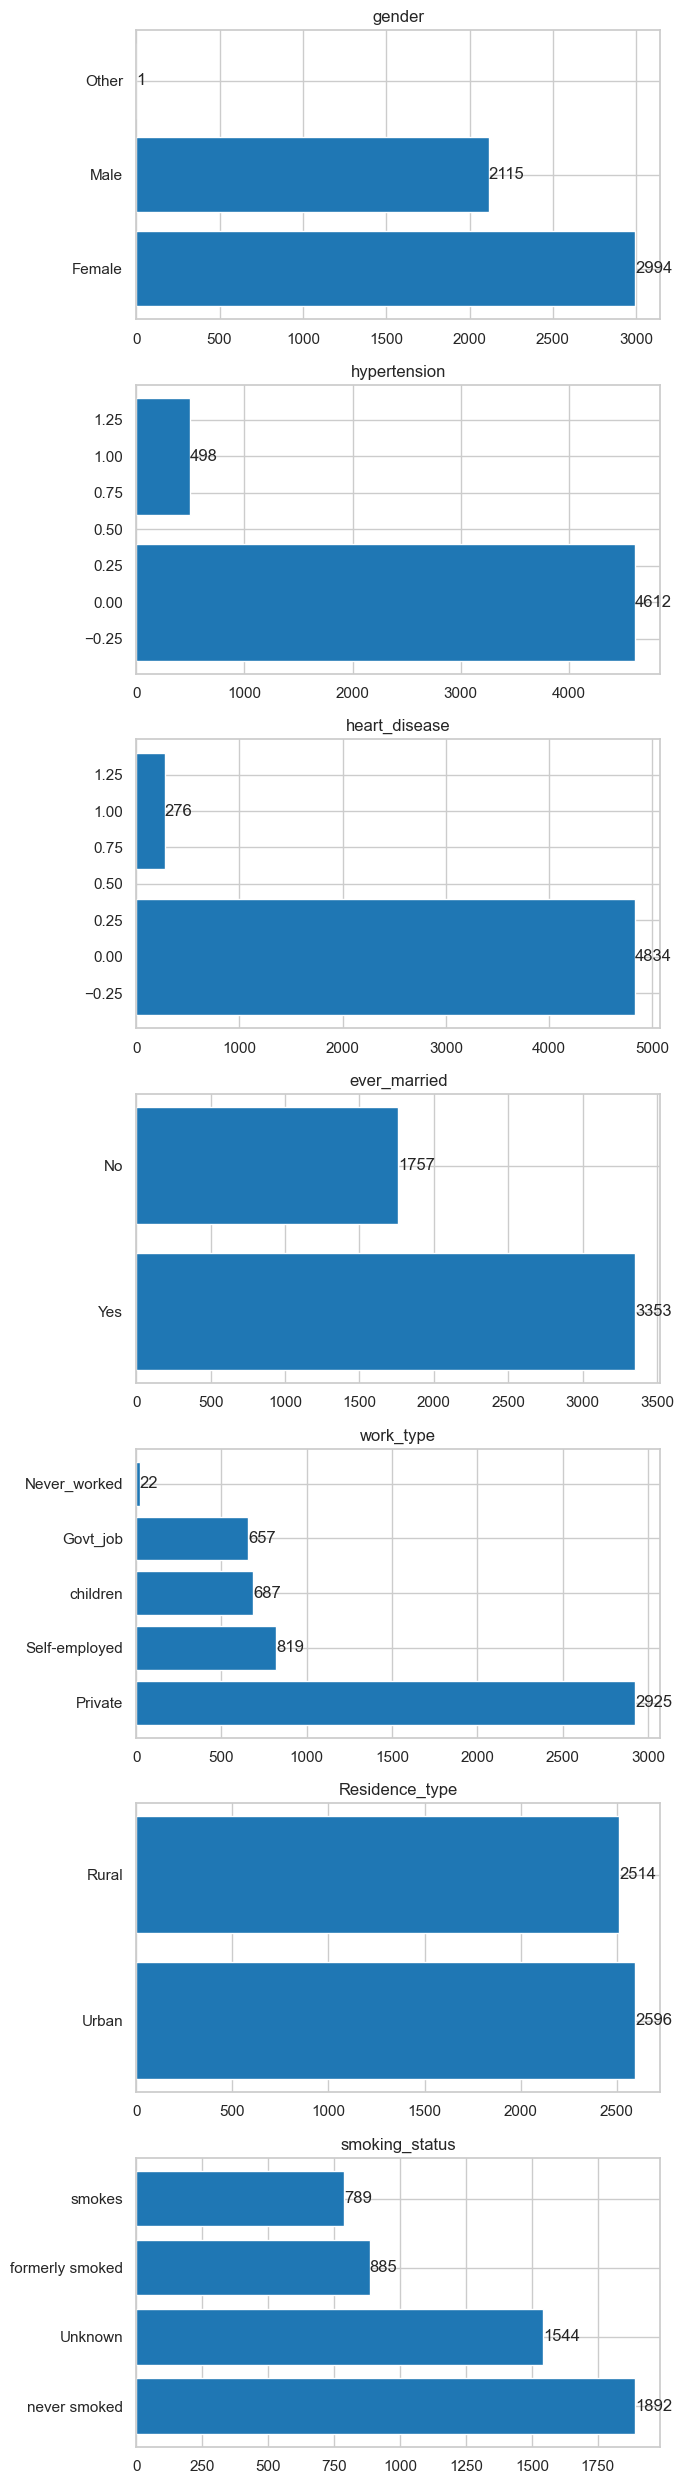

In [14]:
fig, ax = plt.subplots(nrows=7, ncols=1,figsize=(7,25), squeeze=False)
for i in range(len(categorical)):
    bars = ax[i,0].barh(dataframe.value_counts(categorical[i]).index, width = dataframe.value_counts(categorical[i]).values)
    ax[i,0].bar_label(bars)
    ax[i,0].set_title(categorical[i])
fig.tight_layout()


<p><b>Observations</b>: the gender column has only 1 value in the "other" category. </p>

<h3>3.2.b.- Numerical variables</h3>
<a id="Numerical-uni"></a>

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>, <AxesSubplot:>]],
      dtype=object)

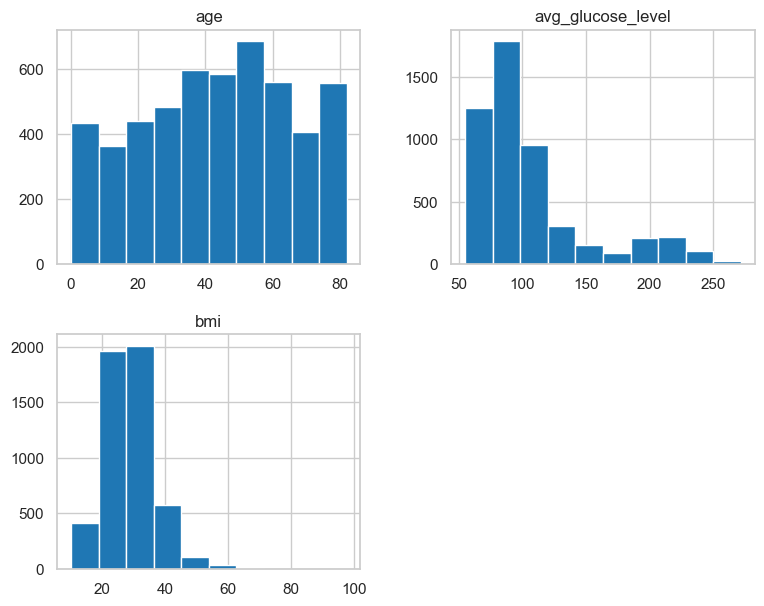

In [15]:
dataframe[numerical].hist(figsize=(9,7))

<h3>3.2.c.- Correlations</h3>
<a id="Correlations"></a>

In [16]:
dataframe.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


<AxesSubplot:>

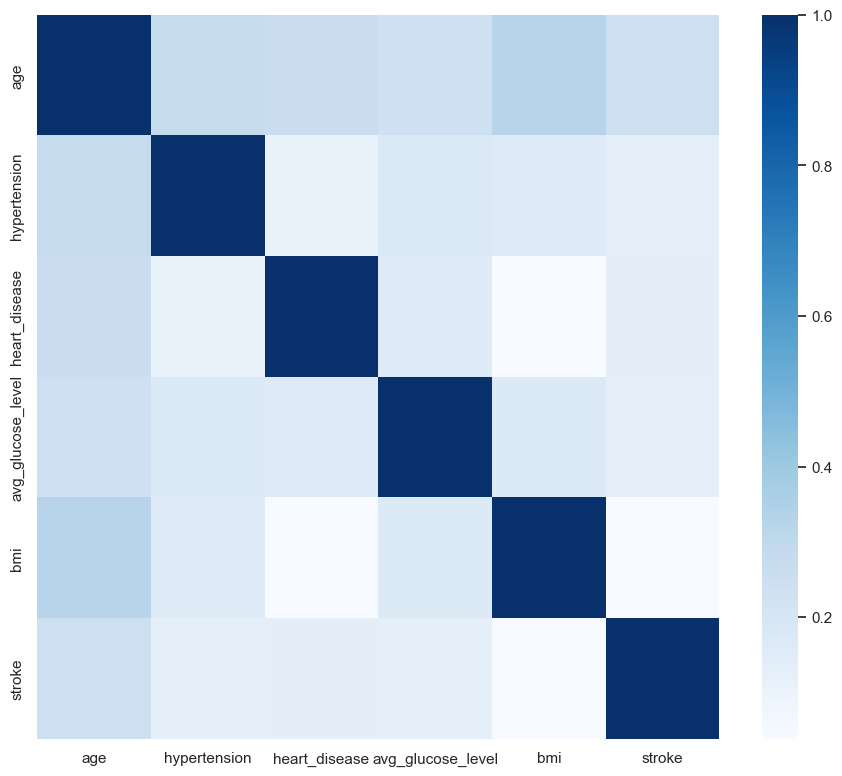

In [17]:
dataframe1 = dataframe.drop('id', axis=1)
sns.heatmap(dataframe1.corr(), cmap='Blues')

<p><b>Observations</b>: the stronger correlation for the stroke variable seems to be with the age variable (Pearson coef = 0.25)</p>

<h2>3.3.- Bivariate analysis</h2>
<a id="Bivariate"></a>

<h3>3.3.a.- Categorical variables</h3>
<a id="Categorical-bi"></a>

In [18]:
for i in range(len(categorical)):
    fig = px.histogram(dataframe, x=categorical[i], color="stroke", title= f'{categorical[i]} & stroke condition', width=400, height=400)
    fig.show()

<h3>3.3.b.- Numerical variables</h3>
<a id="Numerical-bi"></a>

In [19]:
fig = px.scatter(dataframe, x='age', y='bmi', title='Age & BMI ', color='stroke', hover_data = dataframe[['stroke']])
fig.show()

In [20]:
fig = px.scatter(dataframe, x='age', y='avg_glucose_level', title='Age & Average Glucose Level ', color='stroke', hover_data = dataframe[['stroke']])
fig.show()

<p><b>Observations</b>: there are more positive stroke cases in the upper right quadrant of the plot (higher values of glucose level and older age).</p>

<h2>4.- Machine learning models</h2>
<a id="Models"></a>

<h3>4.1.- Importing libraries</h3> 

In [21]:
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [22]:
dataframe[0:10]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


<p>We will first convert the categorical columns to numbers, because typically the ML algorithms work better with this type of data.</p>

In [23]:
le = LabelEncoder()
df_labeled = dataframe.apply(le.fit_transform)
df_labeled[0:10]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,671,1,88,0,1,1,2,1,3850,240,1,1
1,3610,0,82,0,0,1,3,0,3588,162,2,1
2,2151,1,101,0,1,1,2,0,2483,199,2,1
3,4226,0,70,0,0,1,2,1,3385,218,3,1
4,114,0,100,1,0,1,3,0,3394,113,2,1
5,3970,1,102,0,0,1,2,1,3448,164,1,1
6,3766,1,95,1,1,1,2,0,588,147,2,1
7,748,0,90,0,0,0,2,1,1951,101,2,1
8,1894,0,80,0,0,1,2,0,912,162,0,1
9,4243,0,99,0,0,1,2,1,126,115,0,1


In [24]:
X = df_labeled.drop(['stroke'], axis=1)
y = df_labeled.stroke

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=15)

print(f'Number of positive stroke total cases: {sum(y==1)}')
print(f'Number of negative stroke total cases: {sum(y==0)}')
print(f'Number of positive stroke train cases: {sum(y_train==1)}')
print(f'Number of negative stroke train cases: {sum(y_train==0)}')

Number of positive stroke total cases: 249
Number of negative stroke total cases: 4861
Number of positive stroke train cases: 173
Number of negative stroke train cases: 3404


<h3>4.2.- SMOTE</h3>
<a id="Smote"></a>
<p>As observed in section 3.2, our data is severely undersampled for the "stroke positive" class. Given that this is precisely the most importan class for the <br/>
classification, we need to correct this imbalance in order to obtain good results from our ML algorithms. The SMOTE technique is a possible solution for this particular problem.</p>
<img src='https://i.ytimg.com/vi/adHqzek--d0/maxresdefault.jpg' width="800" height="600"></img>

In [25]:
from imblearn.over_sampling import SMOTE
X = df_labeled.drop(['stroke'], axis=1)
y = df_labeled.stroke
sm = SMOTE()
X_res, y_res = sm.fit_resample(X,y)
x_train,x_test,y_train,y_test = train_test_split(X_res,y_res, test_size=0.3,random_state=15)

print(f'Number of positive stroke total cases: {sum(y_res==1)}')
print(f'Number of negative stroke total cases: {sum(y_res==0)}')
print(f'Number of positive stroke train cases: {sum(y_train==1)}')
print(f'Number of negative stroke train cases: {sum(y_train==0)}')

Number of positive stroke total cases: 4861
Number of negative stroke total cases: 4861
Number of positive stroke train cases: 3452
Number of negative stroke train cases: 3353


<h3>4.3.- Defininig and applying our classification models</h3>
<a id="Applying"></a>



<h4>K-fold crossvalidation method<h4>
<p>After defining and fitting our models we will use de K-Fold strategy for cross-validation, wich splits our trainig set into <br/>
k number of sub-sets or <i>folds</i> and will use a different one as a validation set each iteration.</p>
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="800" height="600"></img>

In [26]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=11)])
models.append(['KNNeighbors', KNeighborsClassifier()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=11)])
models.append(['Random Forest', RandomForestClassifier(random_state=11)]) #Bagging based model
models.append(['Ada Boost ',AdaBoostClassifier()]) #Boosting based model
models.append(['XGBoost', XGBClassifier()])  #Boosting based model

def run_models(x_train, x_test, y_train, y_test):
    models_score = []
    kf_score = []
    for name,model in models:
        model = model
        model.fit(x_train,y_train)
        model_pred = model.predict(x_test)
        score = accuracy_score(y_test,model.predict(x_test))
        models_score.append(score)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=11)
        cv_score = np.mean(cross_val_score(estimator = model, X = x_train, y = y_train, cv = cv)) 
        kf_score.append(cv_score)
        print(f'Accuracy Score for {name} model: {score}')
        print(f'Accuracy K-Fold Crossvalidation Mean Score for {name} model: {cv_score}')
        print('#'*25)
    return models_score, kf_score

models_score, kf_score = run_models(x_train,x_test,y_train,y_test)

Accuracy Score for Logistic Regreesion model: 0.7788824134384642
Accuracy K-Fold Crossvalidation Mean Score for Logistic Regreesion model: 0.7859909015001009
#########################
Accuracy Score for KNNeighbors model: 0.8063078505313679
Accuracy K-Fold Crossvalidation Mean Score for KNNeighbors model: 0.8193480608102272
#########################
Accuracy Score for Decision Tree model: 0.9033253342475146
Accuracy K-Fold Crossvalidation Mean Score for Decision Tree model: 0.8879248366013073
#########################
Accuracy Score for Random Forest model: 0.9321220431950634
Accuracy K-Fold Crossvalidation Mean Score for Random Forest model: 0.9317645619187468
#########################
Accuracy Score for Ada Boost  model: 0.8464175522797395
Accuracy K-Fold Crossvalidation Mean Score for Ada Boost  model: 0.8410964988051021
#########################
Accuracy Score for XGBoost model: 0.9403496743229345
Accuracy K-Fold Crossvalidation Mean Score for XGBoost model: 0.9362218911059286
####

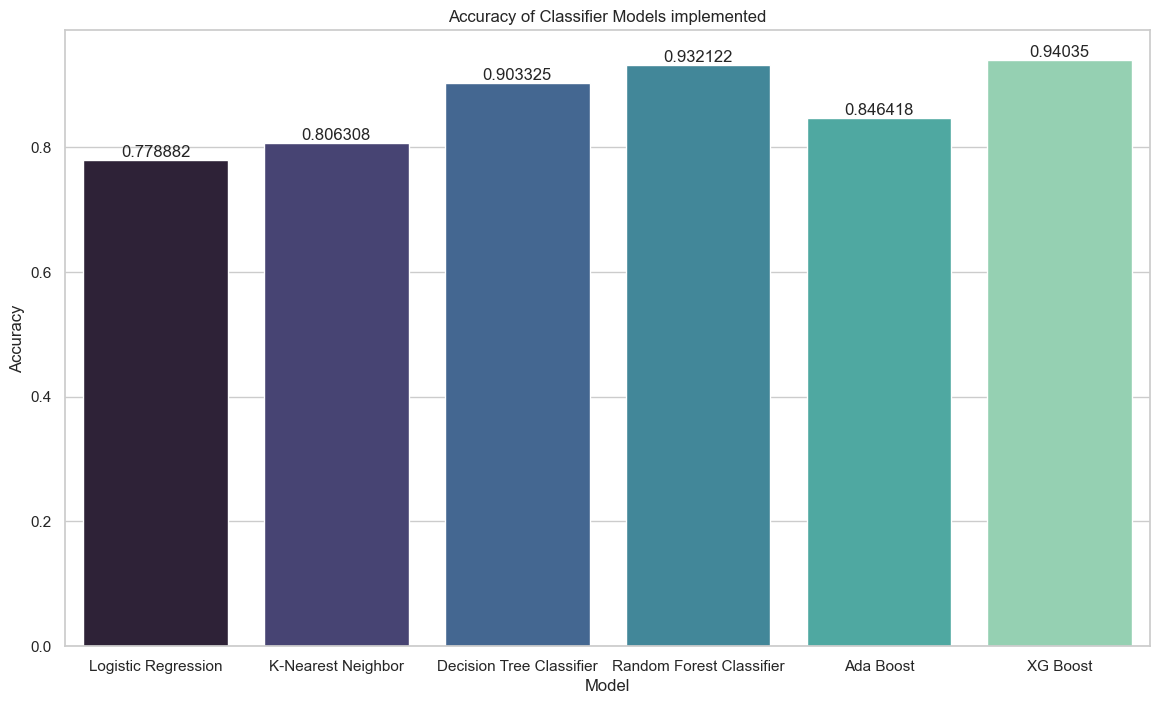

In [27]:
models_names = [
'Logistic Regression',
'K-Nearest Neighbor',
'Decision Tree Classifier',
'Random Forest Classifier',
'Ada Boost',
'XG Boost']

plt.rcParams['figure.figsize'] = (14, 8)
ax = sns.barplot(x=models_names, y=models_score, palette = "mako")
plt.title('Accuracy of Classifier Models implemented')
plt.xlabel('Model' )
plt.ylabel('Accuracy')
ax.bar_label(ax.containers[0])

plt.show()

<p><b>Observation:</b> XGBoost and Random Forest are the best performing models according to the model accuracy obtained. <br/>
We will take the best (XGBoost) and worst (Logistic regression) performing models and see if we can obtain a better performance after hyperparameter tuning.</p>

<h3>4.4.- Hyperparameter Optimization</h3>
<a id="Hyperparam-tuning"></a>

<p>Grid-search is a method used to find the optimal hyperparameters of a model. It searches for the best combination of hyperparameters</br>
between all possible combinations of values that we want to try. In this case: {'C':[0.25,0.5,0.75,1]} for the logistic regression and </br>
{'max_depth': [3, 5, 7, 9],  'n_estimators': [5, 10, 15, 20, 25, 50, 100], 'learning_rate': [0.01, 0.05, 0.1]} for the XGBoost</p>
<img src="https://miro.medium.com/max/1000/1*9W1MrRkHi0YFmBoHi9Y2Ow.png" width = 500 height = 250>

In [28]:
def tune_model(x_train, y_train):
    grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[11]}]), 
              (XGBClassifier(), [{'max_depth': [3, 5, 7, 9],  'n_estimators': [5, 10, 15, 20, 25, 50, 100], 'learning_rate': [0.01, 0.05, 0.1]}])]
    tuned_params = []
    i = 0
    for model,params in grid_models:
        grid = GridSearchCV(estimator=model,param_grid = params, scoring = 'accuracy',cv = 5)
        grid.fit(x_train, y_train)
        best_accuracy = grid.best_score_
        best_params = grid.best_params_
        tuned_params.append(best_params)
        if i == 0:
            print(f'Best accuracy for Logistic Regression model: {best_accuracy}') 
            print(f'Best parameters found for Logistic Regression model: {best_params}')
            i += 1
        else:
            print(f'Best accuracy for XGBoost model: {best_accuracy}')
            print(f'Best parameters found for XGBoost model: {best_params}')
    return tuned_params
tune = tune_model(x_train, y_train)

Best accuracy for Logistic Regression model: 0.7880969875091844
Best parameters found for Logistic Regression model: {'C': 0.5, 'random_state': 11}
Best accuracy for XGBoost model: 0.93269654665687
Best parameters found for XGBoost model: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}


<h3>4.5.- ROC Curve and confusion matrix for best model</h3>
<a id="ROC"></a>

[[1366  142]
 [  44 1365]]


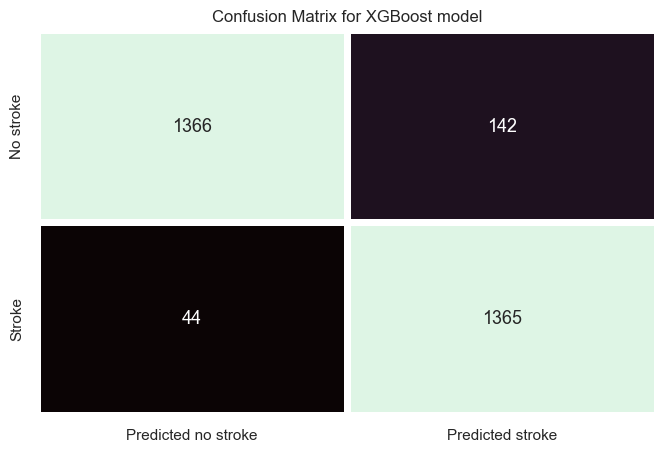

In [29]:
model = XGBClassifier(learning_rate = 0.1, max_depth = 9, n_estimators = 100)
model.fit(x_train,y_train)
model_pred = model.predict(x_test)
cm_xgb = confusion_matrix(y_test, model_pred)
y_prob = model.predict_proba(x_test)[:,1]

fpr, tpr, thresh = roc_curve(y_test, y_prob)

print(cm_xgb)

plt.figure(figsize = (8, 5))
sns.heatmap(cm_xgb, annot=True, fmt = 'd', linewidths = 5, cmap="mako", cbar = False, annot_kws = {'fontsize': 13},
             yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.title('Confusion Matrix for XGBoost model')
plt.show()

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.3f})',
    labels={'x':'False Positive Rate', 'y':'True Positive Rate'},
    width=665, height=400
)
fig.add_shape(
    type='line', line={'dash':'dash'},
    x0=0, x1=1, y0=0, y1=1
)

<h3>4.6.- Classifying my data</h3>
<a id="Myself"></a>

In [30]:
model = XGBClassifier(learning_rate = 0.1, max_depth = 9, n_estimators = 100)
model.fit(x_train,y_train)
model_pred = model.predict(x_test)
cm_xgb = confusion_matrix(y_test, model_pred)
y_prob = model.predict_proba(x_test)[:,1]

In [31]:
x_test.loc[len(x_test.index)] = [6000, 1, 30, 0, 0, 0, 3, 1, 75, 17, 2] #Appending my own data to the test dataset
x_test.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1360,3278,0,81,0,0,1,2,0,278,238,0
5596,3935,1,99,0,0,1,2,1,3305,168,1
199,35,0,95,0,0,1,3,1,841,139,2
1997,4221,0,53,0,0,1,3,0,3080,136,3
2917,6000,1,30,0,0,0,3,1,75,17,2


In [32]:
x_test.loc[x_test['id'] == 6000]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2917,6000,1,30,0,0,0,3,1,75,17,2


In [33]:
y_pred = model.predict(x_test.loc[x_test['id'] == 6000])
y_prob = model.predict_proba(x_test.loc[x_test['id'] == 6000])
print(f'The predicted category for the stroke class using the XGBoost model is {y_pred[0]} with a {y_prob[0, 0]*100}% probability')

The predicted category for the stroke class using the XGBoost model is 0 with a 99.69496726989746% probability


<h2>5.- Conclusions</h2>
<a id="Conclusions"></a>
<ul>
<li>Age seems to be the most correlated variable with stroke class for the numerical variables, followed by glucose level.</li>
<li>At first glance it doesn't seem to exist an obvious pattern between smoking status and stroke class, surprisingly, altough we only perform a <br/>
first look descriptive analysis of the categorical variables.</li>
<li>The best performing classification model with this dataset was the XGBoost Classifier.</li>
<li>The accuracy of the model was lower <b>after</b> the hyperparameter optimization compared to before. This may be caused by a low coverage of the <br/>
hyperparameter dimension, i.e, we didn't try enough combinations of hyperparameters to found the optimal ones. A more exhaustive grid search, with more combinations<br/>
can be a solution to this problem, but this requires more running time.</li>
<li>I was classified by the model as a non-stroke class. Of course, this doesn't replace a doctor's opinion, wich i already have, but it was fun to try!</li>
</ul>